In [5]:
from scipy import stats
import numpy as np
import pandas as pd

In [3]:
unsuper_acc_list = [0.5642,
 0.5,
 0.47856666666666664,
 0.505725,
 0.51738,
 0.5251833333333333,
 0.5307428571428572,
 0.5349250000000001,
 0.5381777777777779,
 0.52565,
 0.5292272727272728,
 0.5337416666666667,
 0.5262076923076924,
 0.5305642857142858,
 0.5226466666666668,
 0.5267750000000001,
 0.5214235294117648,
 0.5165055555555557,
 0.5121473684210528,
 0.51475]

super_acc_list = [0.982,
 0.982,
 0.9819999999999999,
 0.982,
 0.982,
 0.9820000000000001,
 0.9820000000000001,
 0.9820000000000001,
 0.9820000000000001,
 0.982,
 0.982,
 0.9819999999999999,
 0.9819999999999999,
 0.9819999999999999,
 0.9819999999999998,
 0.9819999999999998,
 0.9819999999999998,
 0.9819999999999998,
 0.9819999999999997,
 0.9819999999999997]

In [4]:
rng = np.random.default_rng()

stats.ttest_ind(super_acc_list, unsuper_acc_list)

/var/folders/7c/qkgvhpr91dlgl_0wdyzw93zh0000gn/T/ipykernel_71302/1349076506.py:3: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats.ttest_ind(super_acc_list, unsuper_acc_list)


Ttest_indResult(statistic=121.38291818254135, pvalue=8.060628918794918e-51)

In [6]:
df = pd.read_pickle('data/pkl_vector_10k_reviews.pkl')

# Extract only the feature vectors
features = df.vector.to_list()
actual_labels = df.good_rating

/Users/elizabethjohnson/opt/anaconda3/envs/p-recs10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/elizabethjohnson/opt/anaconda3/envs/p-recs10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



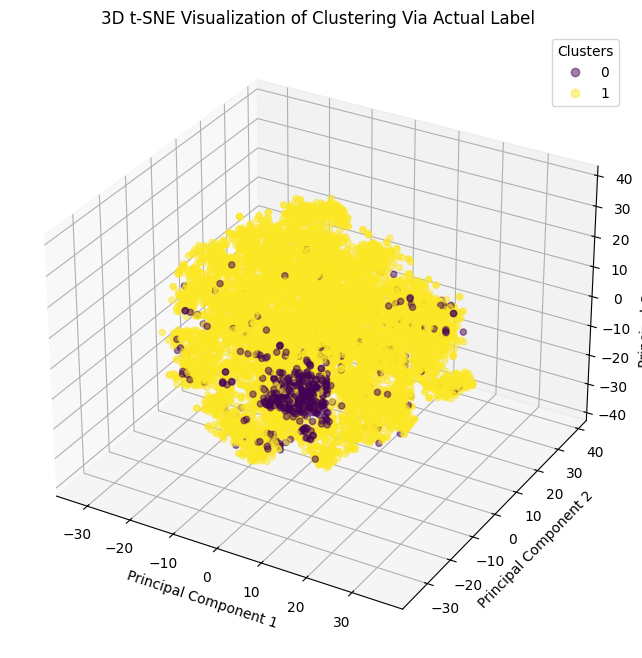

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Extract only the feature vectors
array_features = np.array(features)
array_labels = np.array(actual_labels)

# Apply t-SNE
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(array_features)

# Create a scatter plot of the t-SNE representation with color-coded clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=array_labels, cmap='viridis', alpha=0.5)

# Add legend
ax.set_title('3D t-SNE Visualization of Clustering Via Actual Label')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend(*scatter.legend_elements(), title='Clusters')

plt.show()

In [8]:
import plotly.express as px

fig = px.scatter_3d(x=X_tsne[:, 0], y=X_tsne[:, 1], z=X_tsne[:, 2], color=array_labels)
fig.update_layout(title='3D Visualization of High-Dimensional Clustering')
fig.show()